In [33]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [13]:
import json
with open("db.json", "r") as f:
    data = json.load(f)
    

In [14]:
print(len(data['houses'][0]['apartments'][3]['Hydractiva_shower']['measurements']))

583


In [15]:
flat_data = []
equipment_ids = ['Hydractiva_shower','Kitchen_optima_faucet','Optima_faucet','Washing_machine','Dishwasher']

for item in data['houses'][0]['apartments']:
    apart_no = 0
    for apart_item in data['houses'][0]['apartments']:
        apart_no += 1
        people_id = apart_item['people'] 
        for equipment in equipment_ids:
            if equipment in apart_item:
                for measurement in apart_item[equipment]['measurements']:
                    #print(measurement)
                    tmp = measurement.copy()
                    tmp['people_id'] = people_id
                    tmp['apart_no'] = apart_no
                    tmp['equipment_id'] = equipment
                    #print(tmp)
                    flat_data.append(tmp) 
print(len(flat_data))
#print(data['houses'][0]['apartments'][0]['Hydractiva_shower']['measurements'][0])



6221860


In [16]:
df_water = pd.DataFrame(flat_data)

In [19]:
df_water = pd.read_json('flat_data.json')

In [20]:
df_water.head()

,Consumption,Temp,FlowTime,Power_Consumption,TimeStamp,people_id,apartment_id,equipment
0,11.569686,35.992030,56.762955,0.418329,2020-01-01 09:00:18,3,1,Hydractiva_shower
1,56.704520,39.444153,287.902560,2.278662,2020-01-01 10:50:50,3,1,Hydractiva_shower
2,36.050370,39.709408,215.509060,1.459835,2020-01-01 23:34:59,3,1,Hydractiva_shower
3,24.071253,40.377690,148.698010,0.993516,2020-01-03 23:47:24,3,1,Hydractiva_shower
4,22.413982,38.956540,103.678070,0.887951,2020-01-04 06:39:43,3,1,Hydractiva_shower


In [21]:
df_water.describe()

,Consumption,Temp,FlowTime,Power_Consumption,people_id,apartment_id
count,311093.000000,311093.000000,311093.000000,3.110930e+05,311093.000000,311093.000000
mean,8.350946,30.986299,523.632713,2.519959e-01,2.916417,10.622650
std,10.143318,13.409528,2036.108360,4.351336e-01,0.904017,6.217654
min,0.070071,4.000283,2.000338,8.915667e-08,1.000000,1.000000
25%,2.994814,20.000000,35.512287,4.240856e-02,2.000000,5.000000
50%,5.900114,31.205894,67.525470,1.153576e-01,3.000000,10.000000
75%,9.596047,40.216150,99.400940,2.531575e-01,4.000000,17.000000
max,64.339775,60.000000,10800.000000,3.266666e+00,4.000000,20.000000


In [29]:
apartment_1 = df_water[df_water['apartment_id'] == 1]

<AxesSubplot:xlabel='TimeStamp', ylabel='Consumption'>

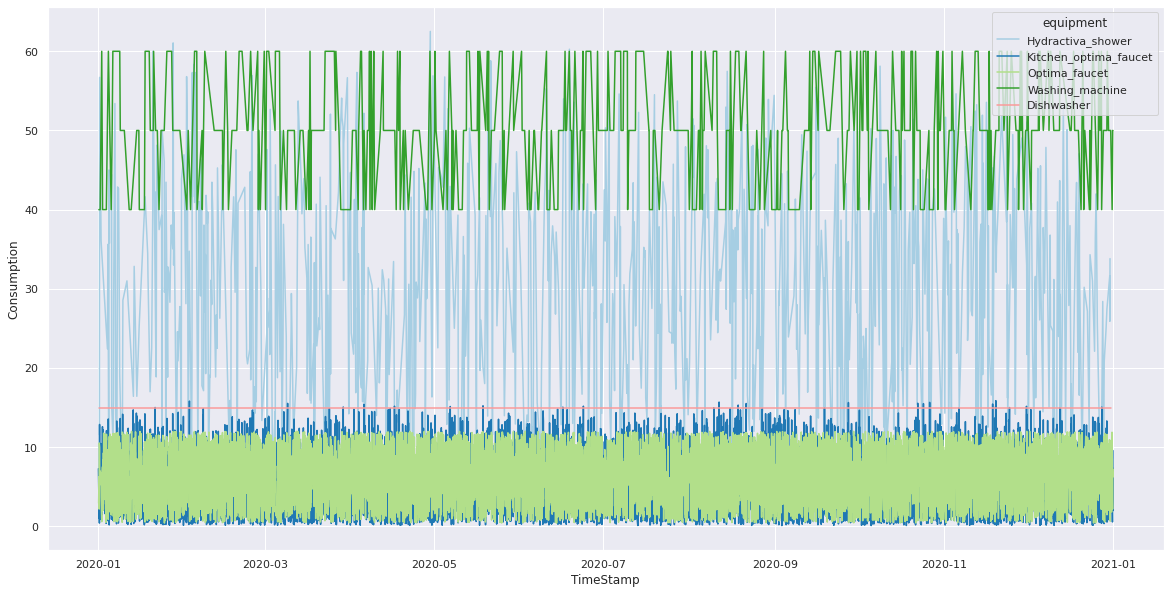

In [38]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_palette("Paired")
sns.lineplot(data=apartment_1, x="TimeStamp", y="Consumption", hue="equipment")